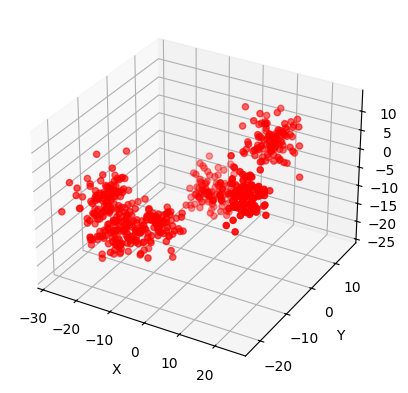

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import string
from sklearn.decomposition import PCA


def generate_cluster_centers(num_clusters, min_val, max_val):
    cluster_centers = np.random.uniform(min_val, max_val, size=(num_clusters, 3))
    return cluster_centers

def generate_cluster_data(cluster_centers, total_points, mean_distance, std_dev_distance, cluster_label_set=None):
    cluster_data = []
    labels = []
    for ix, center in enumerate(cluster_centers):
        points = np.random.normal(loc=center, scale=std_dev_distance, size=(total_points, 3))
        labels.extend([cluster_label_set[ix]] * total_points)
        cluster_data.append(points)
    return np.concatenate(cluster_data), labels

def generate_cluster_labels(num_clusters):
    alphabet = string.ascii_uppercase
    labels = []
    for i in range(num_clusters):
        if i < 26:
            label = alphabet[i]
        else:
            label = f"{alphabet[i % 26]}{i // 26}"
        labels.extend([label] )
    return labels



num_clusters = 6
min_val = -20   # min and max values for the cluster centers
max_val = 20
total_points = 100
mean_distance = 9.0
std_dev_distance = 3

# Generate cluster labels
cluster_label_set = generate_cluster_labels(num_clusters)
cluster_centers = generate_cluster_centers(num_clusters, min_val, max_val)
cluster_data, cluster_labels = generate_cluster_data(cluster_centers, total_points, mean_distance, std_dev_distance, cluster_label_set)

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


# Attach cluster labels to each datapoint
labeled_cluster_data = np.column_stack((cluster_data, cluster_labels))
raw_data = np.copy(cluster_data)


In [25]:
raw_data.shape

(600, 3)

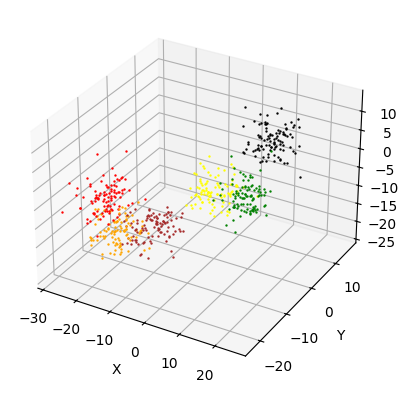

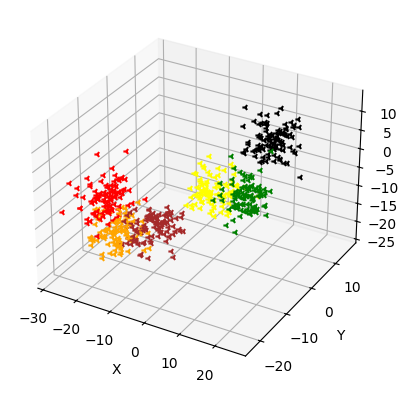

In [37]:
import matplotlib.pyplot as plt

# Define the resistor color code colors
colors = ['black', 'brown', 'red', 'orange', 'yellow', 'green', 'blue', 'violet', 'gray', 'white']

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assign a unique color to each cluster
unique_labels = set(cluster_labels)
num_clusters = len(unique_labels)
color_map = dict(zip(unique_labels, colors[:num_clusters]))

# Plot each data point with its corresponding cluster color
for i, label in enumerate(cluster_labels):
    ax.scatter(cluster_data[i, 0], cluster_data[i, 1], cluster_data[i, 2], c=color_map[label], marker='o', s=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each data point with its corresponding cluster color
for i, label in enumerate(cluster_labels):
    ax.scatter(raw_data[i, 0], raw_data[i, 1], raw_data[i, 2], c=color_map[label], marker='3', s=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()



h:\dev\git\csc730\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


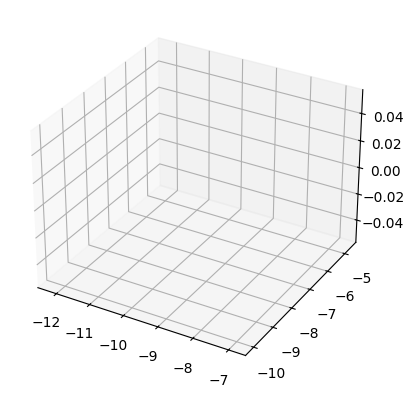

KeyboardInterrupt: 

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Set the size of the grid
grid_size = 0.5

# Create the grid
x_min_val = np.min(raw_data[:][0])
y_min_val = np.min(raw_data[:][1])
z_min_val = np.min(raw_data[:][2])

x_max_val = np.max(raw_data[:][0])  
y_max_val = np.max(raw_data[:][1])
z_max_val = np.max(raw_data[:][2])

x_span = x_max_val - x_min_val
y_span = y_max_val - y_min_val
z_span = z_max_val - z_min_val

x = np.arange(x_min_val, x_max_val, grid_size)
y = np.arange(y_min_val, y_max_val, grid_size)
z = np.arange(z_min_val, z_max_val, grid_size)

#generate a 3 dimensional grid using x, y, z
X, Y, Z = np.meshgrid(y, x, z, indexing='xy')

# Create the volumetric grid
grid = np.zeros_like(X)

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Assign values to the grid based on the cluster labels
for i, label in enumerate(cluster_labels):
    if i < cluster_data.shape[0]:
        xi = int(grid.shape[0]*((raw_data[i][0] - x_min_val) / x_span))
        yi = int(grid.shape[1]*((raw_data[i][1] - y_min_val) / y_span))
        zi = int(grid.shape[2]*((raw_data[i][2] - z_min_val) / z_span))
        grid[xi, yi, zi] += 1

# Plot the volumetric grid
ax.voxels(X, Y, Z, grid, edgecolor='k')

# Plot each data point with its corresponding cluster color
for i, label in enumerate(cluster_labels):
    if i < cluster_data.shape[0]:
        ax.scatter(cluster_data[i, 0], cluster_data[i, 1], cluster_data[i, 2], c=color_map[label], marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
